https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

In [18]:
from Database import db_mongo

import string

In [20]:
db = db_mongo.db_mongo()

db.insert_text({"text":"Text content"})

df = db.get_text(100000)

df = df.sample(frac=1).reset_index(drop=True)

#df = df[:100]

# print(items_df)



Init DB


In [ ]:
all_text = list()
all_titles = df["class"].unique()

print(df)

for item in df["text"]:
    # This does not give a very readable output
    text = item.encode('utf8')
    #print(item)
    #all_text.append(item)
    
    nopunc = [word.replace('\n'," ").replace('\x0c'," ") for word in item if word not in string.punctuation]
       
    
        
    nopunc = ''.join(nopunc)
    all_text.append(nopunc.lower())

In [3]:
import pandas as pd

articles= all_titles
wiki_lst= all_text
title=[]
for article in articles:
    #print("loading content: ",article)
    #wiki_lst.append(all_tes)
    title.append(article)
print("examine content")


examine content


In [4]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [5]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [6]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [7]:

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [8]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in wiki_lst:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [9]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3058444 items in vocab_frame


In [10]:
print(vocab_frame.head())

                 words
e                    e
implement  implemented
a                    a
sustain    sustainable
qualiti        quality


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                                 min_df=0.3, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,2))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(wiki_lst) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

X = tfidf_matrix

/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 49.3 s, sys: 156 ms, total: 49.5 s
Wall time: 49.5 s
(33648, 2)


In [12]:
print(tfidf_vectorizer.get_feature_names())
print(X.shape)

['manag', 'state']
(33648, 2)


In [13]:
print(X)

  (1, 0)	0.4129458111405314
  (1, 1)	0.9107555967774718
  (2, 0)	0.9385974806116824
  (2, 1)	0.34501415824485027
  (3, 0)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 0)	0.8757061637895756
  (14, 1)	0.48284440009276786
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 0)	0.6717513327497687
  (17, 1)	0.7407767186871557
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 0)	1.0
  (22, 0)	0.6717513327497687
  (22, 1)	0.7407767186871557
  (23, 0)	1.0
  (24, 1)	1.0
  (27, 0)	0.8056988978478056
  (27, 1)	0.5923253210920761
  :	:
  (33622, 0)	0.6717513327497687
  (33622, 1)	0.7407767186871557
  (33623, 0)	0.6717513327497687
  (33623, 1)	0.7407767186871557
  (33624, 1)	1.0
  (33625, 0)	0.9561468950775854
  (33625, 1)	0.2928875467367859
  (33626, 0)	0.4129458111405314
  (33626, 1)	0.9107555967774718
  (33627, 1)	1.0
  (33628, 0)	0.6717513327497687
  (33628, 1)	0.7407767186871557
  (33630, 0)	1.0
  (33631, 1)	1.0
  (33632, 0)	0.2210946473638826
  (33632, 1)	0.9752523554993551
  (33634, 0)	1.0
 

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

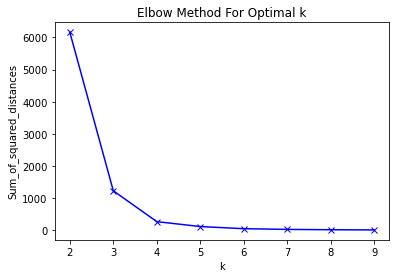

In [15]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [16]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                     title  cluster
24                     NaN        0
20                 FINANCE        0
16                      HR        0
15              AUTOMOBILE        0
13                 BANKING        0
7         PUBLIC-RELATIONS        0
18              ACCOUNTANT        1
11                    ARTS        1
10                    CHEF        1
0                 ADVOCATE        1
5     BUSINESS-DEVELOPMENT        1
4             CONSTRUCTION        1
9                  TEACHER        1
8   INFORMATION-TECHNOLOGY        2
6            DIGITAL-MEDIA        2
23                     BPO        2
3                    SALES        2
19              CONSULTANT        2
21                AVIATION        2
12             ENGINEERING        2
17             AGRICULTURE        3
22                DESIGNER        3
14              HEALTHCARE        4
1                  FITNESS        5
2                  APPAREL        6


Cluster: 0
Titles
PUBLIC-RELATIONS
         BANKING
      AUTOMOBILE
              HR
         FINANCE
             NaN


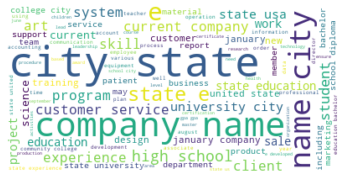

Cluster: 1
Titles
            ADVOCATE
        CONSTRUCTION
BUSINESS-DEVELOPMENT
             TEACHER
                CHEF
                ARTS
          ACCOUNTANT


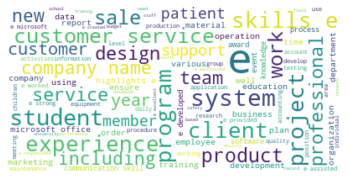

Cluster: 2
Titles
                 SALES
         DIGITAL-MEDIA
INFORMATION-TECHNOLOGY
           ENGINEERING
            CONSULTANT
              AVIATION
                   BPO


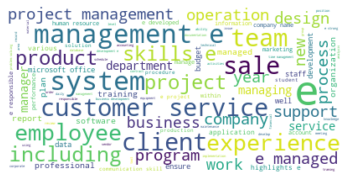

Cluster: 3
Titles
AGRICULTURE
   DESIGNER


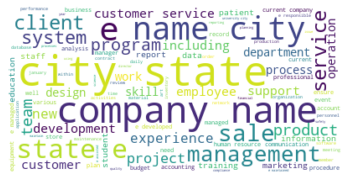

Cluster: 4
Titles
HEALTHCARE


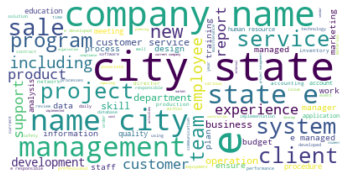

Cluster: 5
Titles
FITNESS


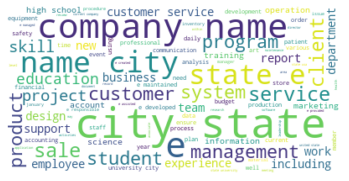

Cluster: 6
Titles
APPAREL


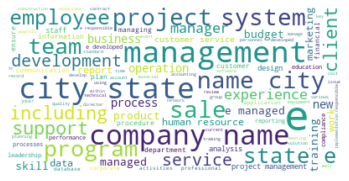

In [17]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()